In [1]:
%load_ext autoreload
from pathlib import Path

In [116]:
%autoreload 2

from process.graph import DocumentGraph

In [149]:
graph = DocumentGraph(content_dir=Path("process/test-content"))

In [150]:
v = next(graph.vertices)
v.uuid

'6f7408d1-3c67-4b51-bbdd-acab24eab949'

In [119]:
graph.predicates

['in', 'is', 'ref', 'format', 'about', 'uses', 'cite']

In [151]:
v.document_json

{'link_ref_defs': {},
 'children': [{'children': [{'predicate': 'in',
     'object': 'development',
     'view': '',
     'text': '',
     'children': [{'element': 'raw_text', 'children': 'in', 'escape': True}],
     'element': 'internal_link'}],
   'element': 'paragraph'}],
 'element': 'document'}

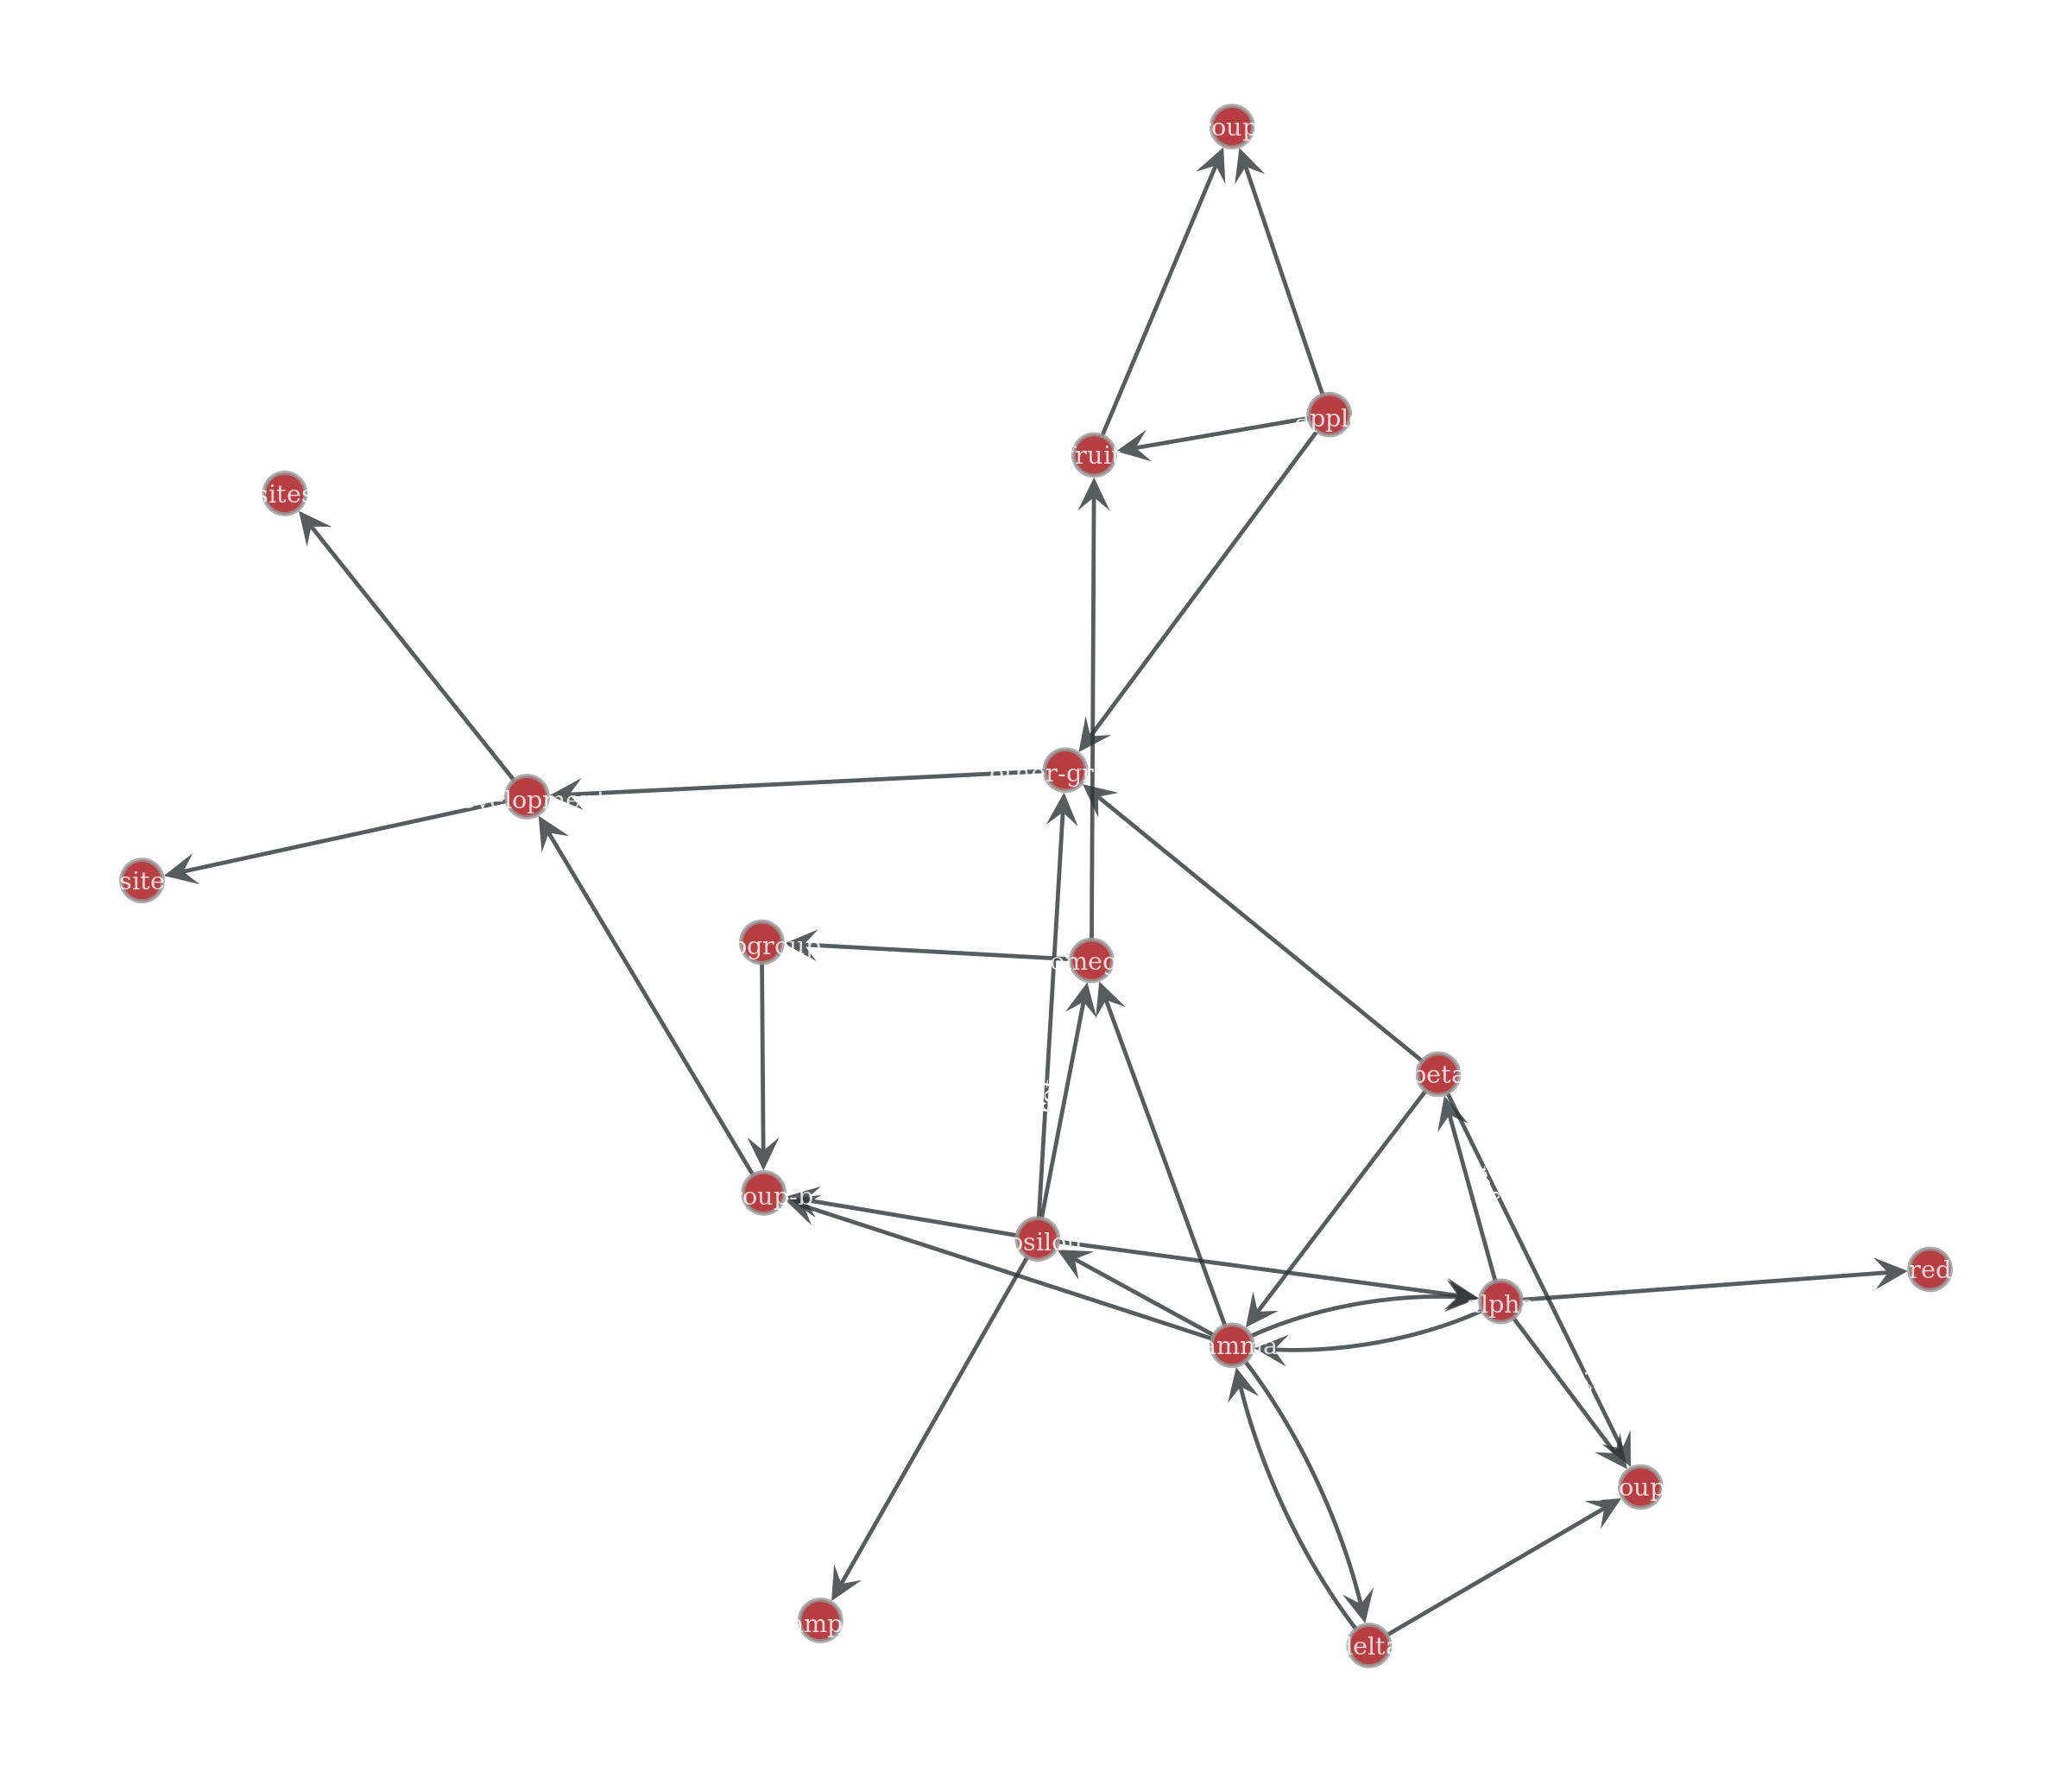

In [106]:
#layout = graph.layout("sfdp")
graph.draw(output_size=(1200,600))

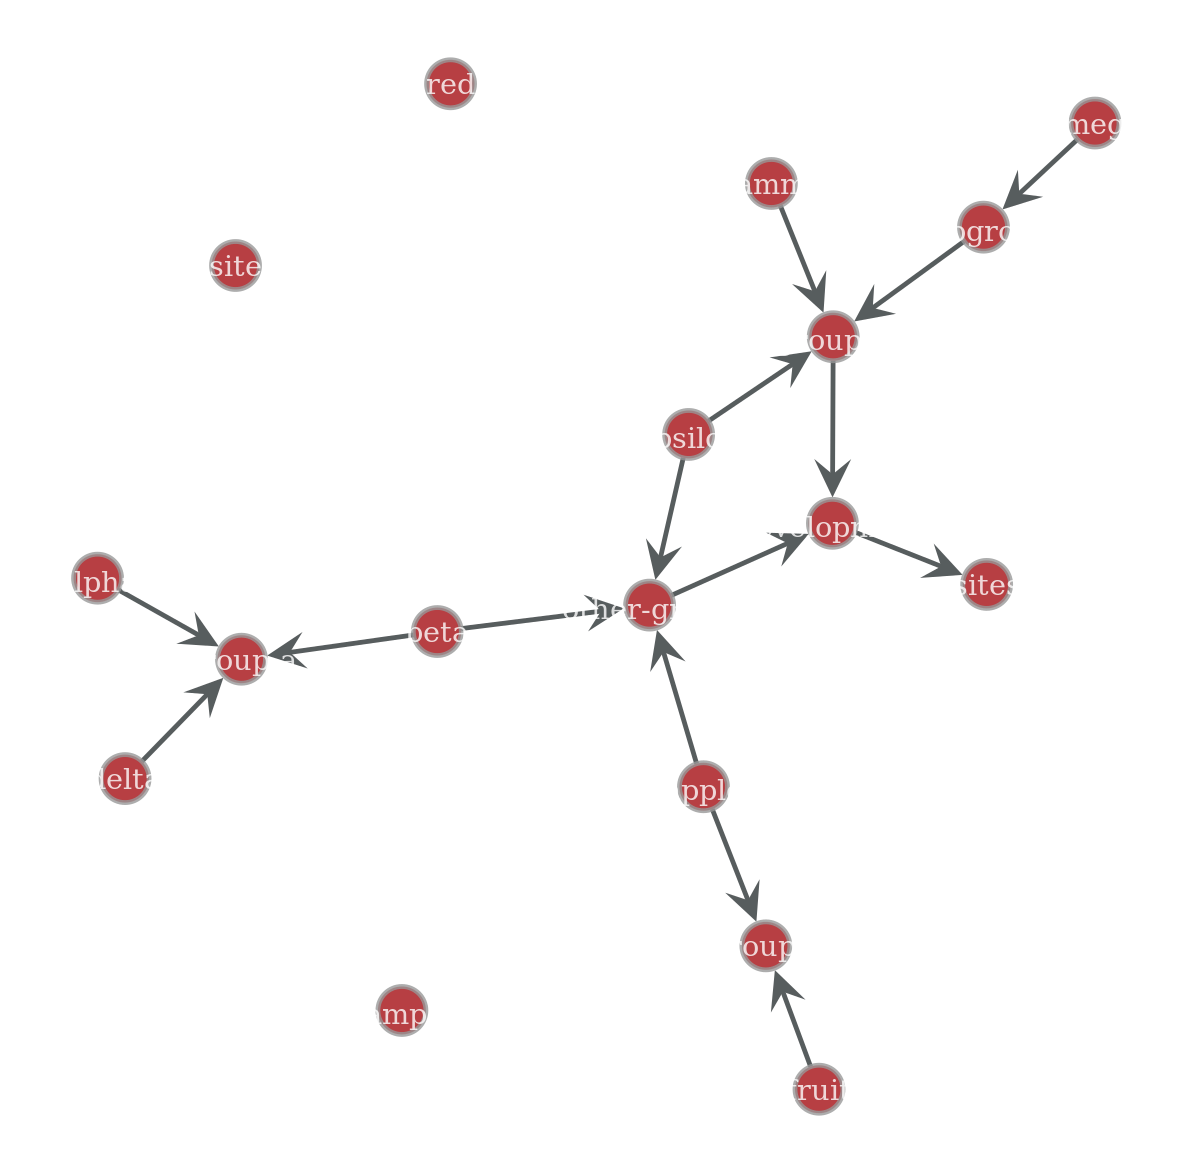

In [102]:
igraph = graph.pgraph_in
igraph.draw()

In [40]:
igraph["other-group"]

<DocumentVertex 'other-group'>

In [157]:
graph["omega"].shortest_path_to(graph["group-b"])

([<DocumentVertex 'omega'>,
  <DocumentVertex 'subgroup'>,
  <DocumentVertex 'group-b'>],
 [<DocumentEdge "'omega' -[in]-> 'subgroup'">,
  <DocumentEdge "'subgroup' -[in]-> 'group-b'">])

In [165]:
list(graph["alpha"].out_edges())[2].elements["is"]

In [130]:
import rdflib
rdflib.graph.Graph

rdflib.graph.Graph

In [140]:
v.document

In [138]:
graph.renderer.render(v.document)

{'link_ref_defs': {},
 'children': [{'children': [{'predicate': 'in',
     'object': 'development',
     'view': '',
     'text': '',
     'children': [{'element': 'raw_text', 'children': 'in', 'escape': True}],
     'parent': <marko.block.Paragraph at 0x7fbd373a3ac0>,
     'element': 'internal_link'}],
   'parent': <marko.block.Document at 0x7fbd373a3f70>,
   'element': 'paragraph'}],
 'parent': None,
 'element': 'document'}

In [129]:
graph.renderer.render(v.document)

{'link_ref_defs': {},
 'children': [{'children': [{'predicate': 'in',
     'object': 'development',
     'view': '',
     'text': '',
     'children': [{'element': 'raw_text', 'children': 'in', 'escape': True}],
     'parent': <marko.block.Paragraph at 0x7fbd373a3ac0>,
     'element': 'internal_link'}],
   'parent': <marko.block.Document at 0x7fbd373a3f70>,
   'element': 'paragraph'}],
 'parent': None,
 'element': 'document'}

In [126]:
graph.renderer.render_children(v.document)

AttributeError: 'Markdown' object has no attribute 'render_children'

In [82]:
sg = graph.subgraph_around(graph["group-b"], False)
sg.graph

<GraphView object, directed, with 4 vertices and 4 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd3758b580, at 0x7fbd37574670>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd3758b580, at 0x7fbd37574fd0>, False), at 0x7fbd3758b580>

In [42]:
sg.graph

<GraphView object, directed, with 0 vertices and 0 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd59260670, at 0x7fbd5915ceb0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd59260670, at 0x7fbd592945e0>, False), at 0x7fbd59260670>

In [115]:
graph["gamma"].document

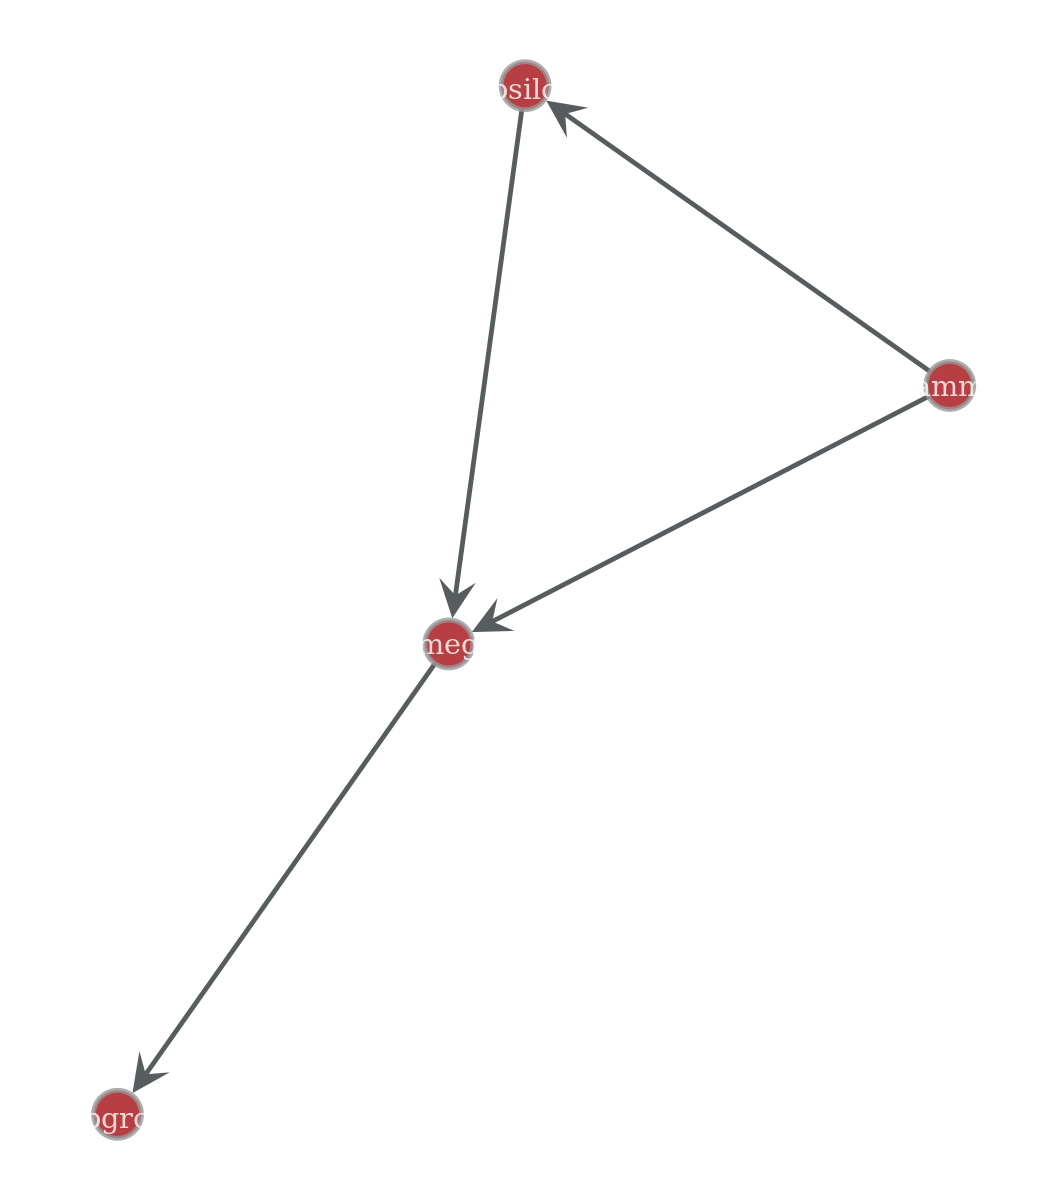

In [83]:
sg.draw()

In [122]:
schema = graph.graphql_schema
schema.execute("""
{
    nodes(type: "site")
    {
        name
    }
}
""")

ExecutionResult(data={'nodes': [{'name': 'development'}]}, errors=None)

In [123]:
schema.execute("""
{
    nodeByName(name: "gamma", filter: {inSubgraph: "development"})
    {
        name
        document
    }
}
""")

<GraphView object, directed, with 9 vertices and 13 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd37463f40, at 0x7fbd374e5c40>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd37463f40, at 0x7fbd374e5730>, False), at 0x7fbd37463f40>


ExecutionResult(data={'nodeByName': None}, errors=[GraphQLError('Object of type Paragraph is not JSON serializable', locations=[SourceLocation(line=6, column=9)], path=['nodeByName', 'document'])])

In [125]:
a, b = parsed
b["n_nodes"]

13